<a href="https://colab.research.google.com/github/thangamani21/NM-Project/blob/main/Source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn
 # Install Gradio if not already installed
!pip install gradio

# (Optional) Update scikit-learn to the latest version
!pip install -U scikit-learn

# Install pandas and numpy (usually pre-installed)
!pip install pandas numpy

Saving Housing.csv to Housing.csv
First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Shape: (545, 13)
<class 'pandas.core.frame.DataFr

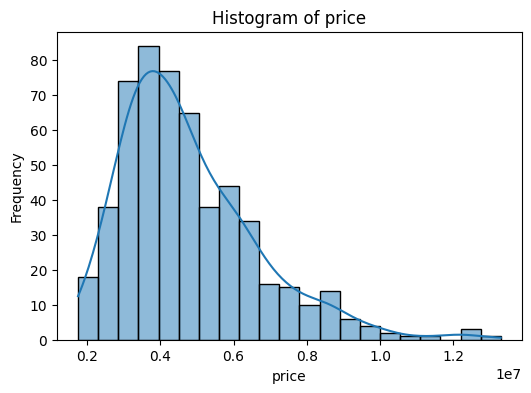

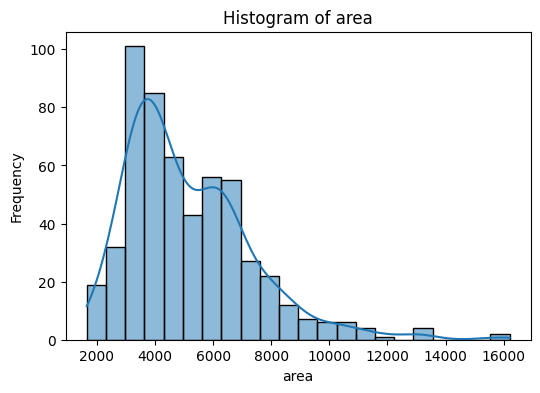

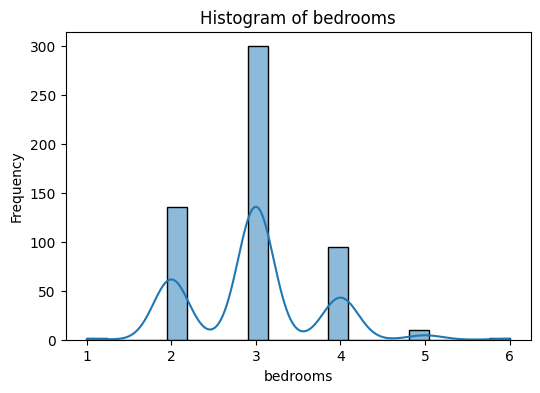

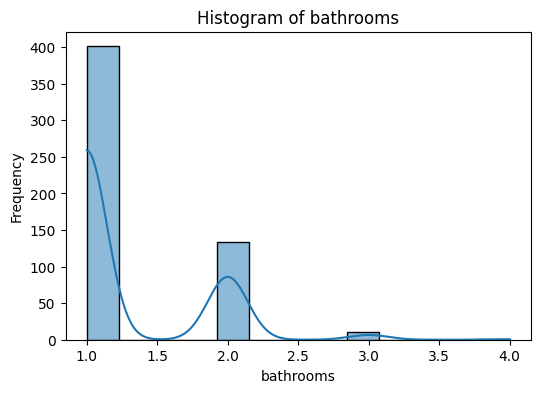

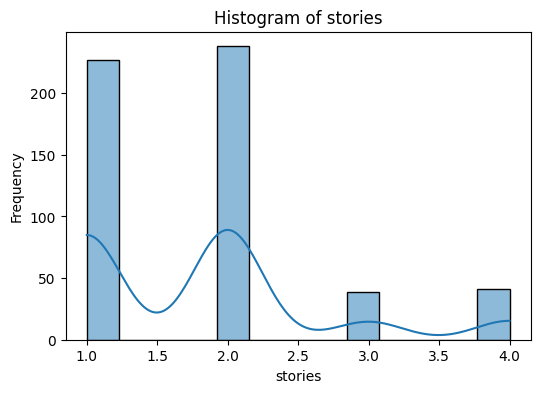

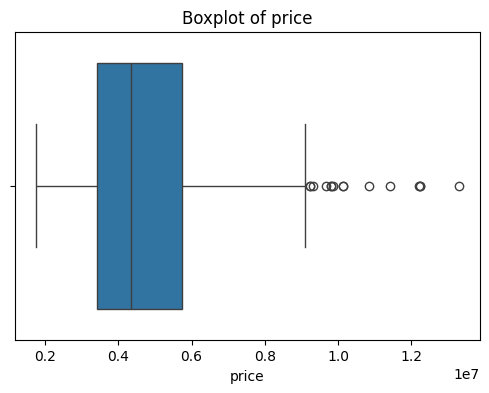

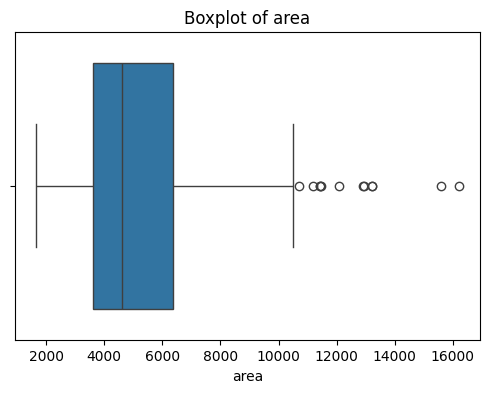

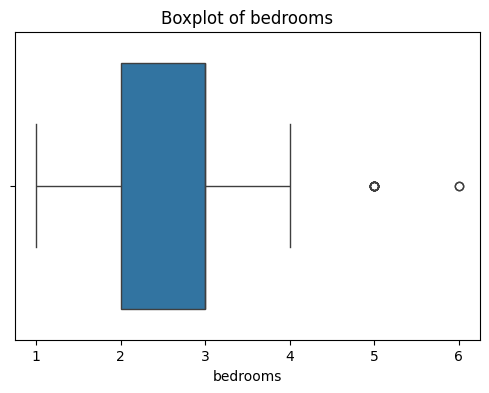

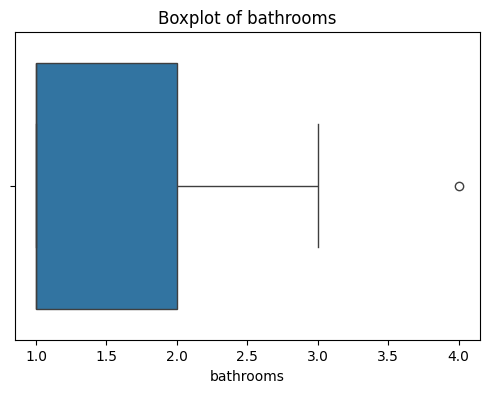

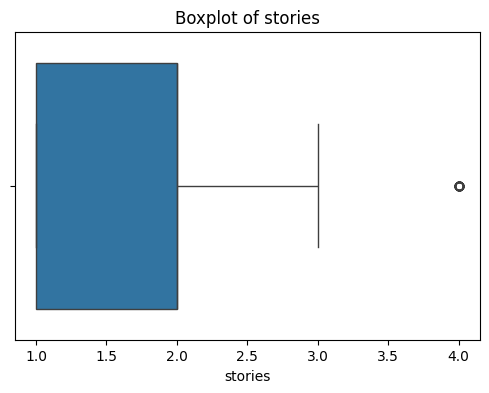

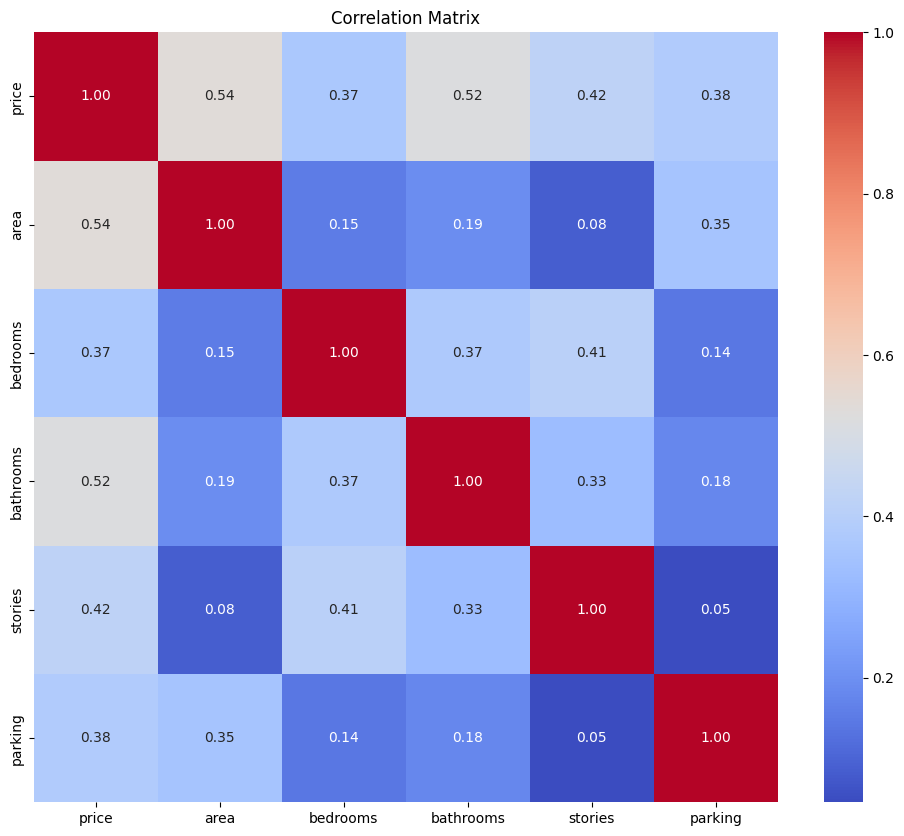

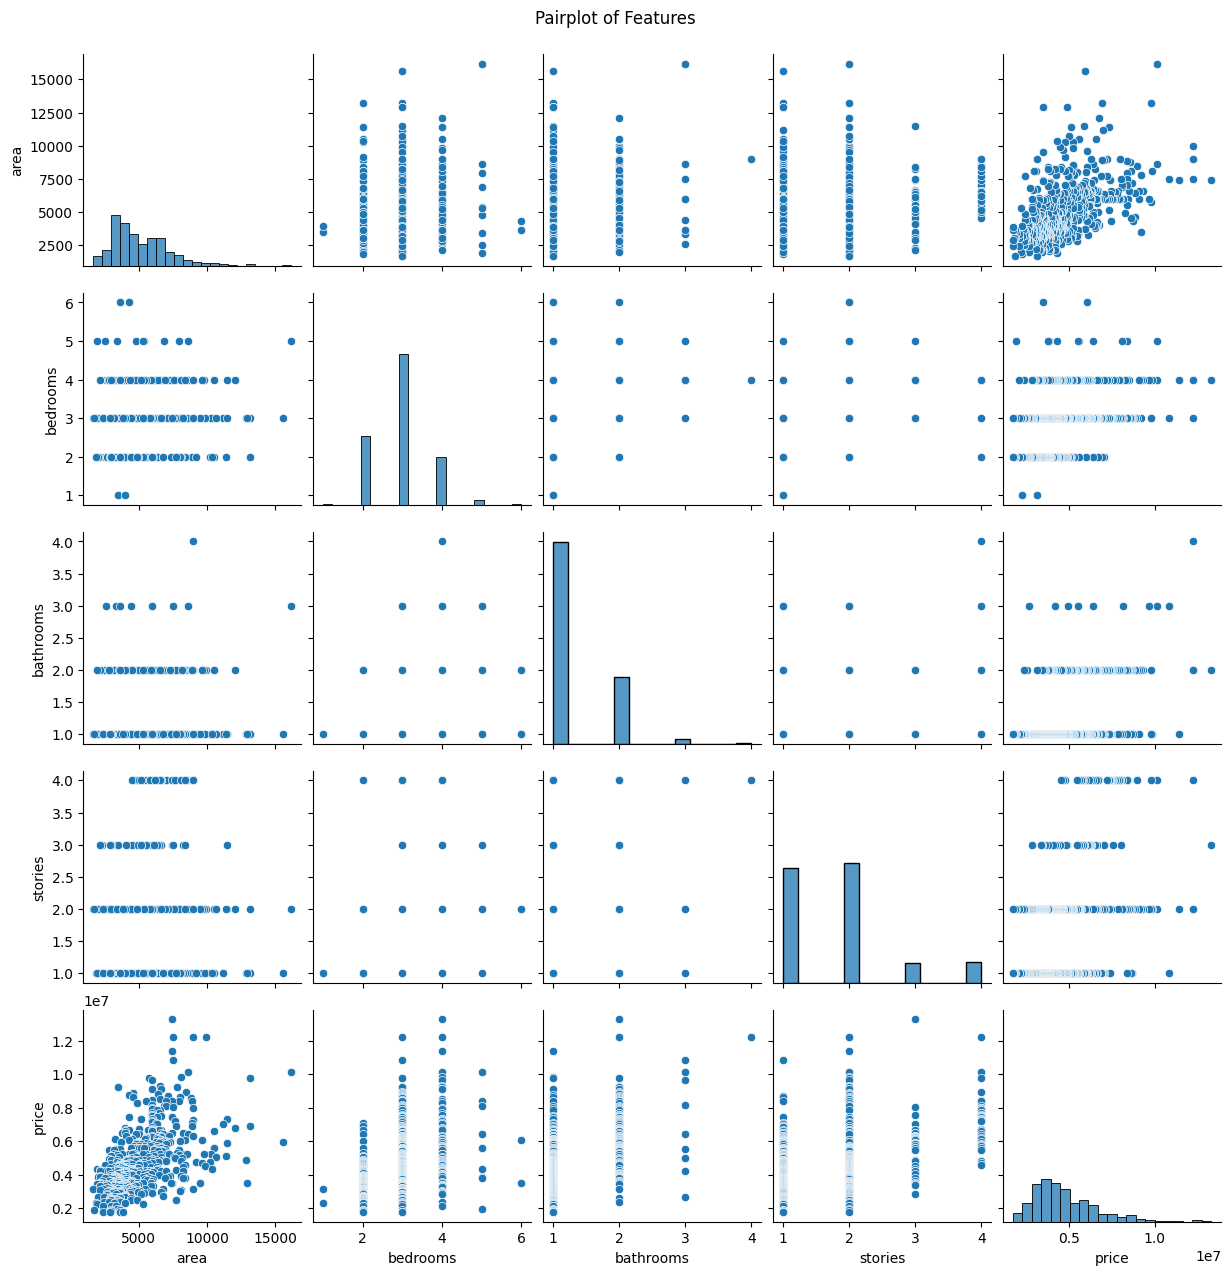

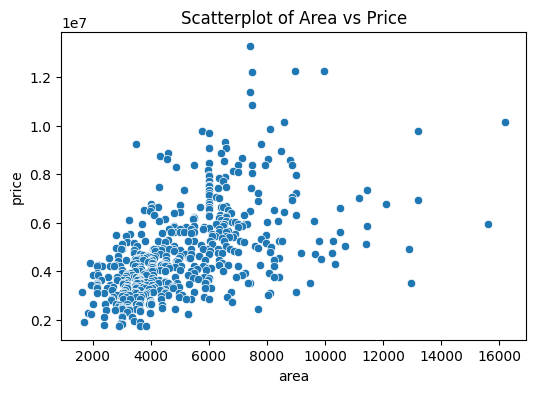

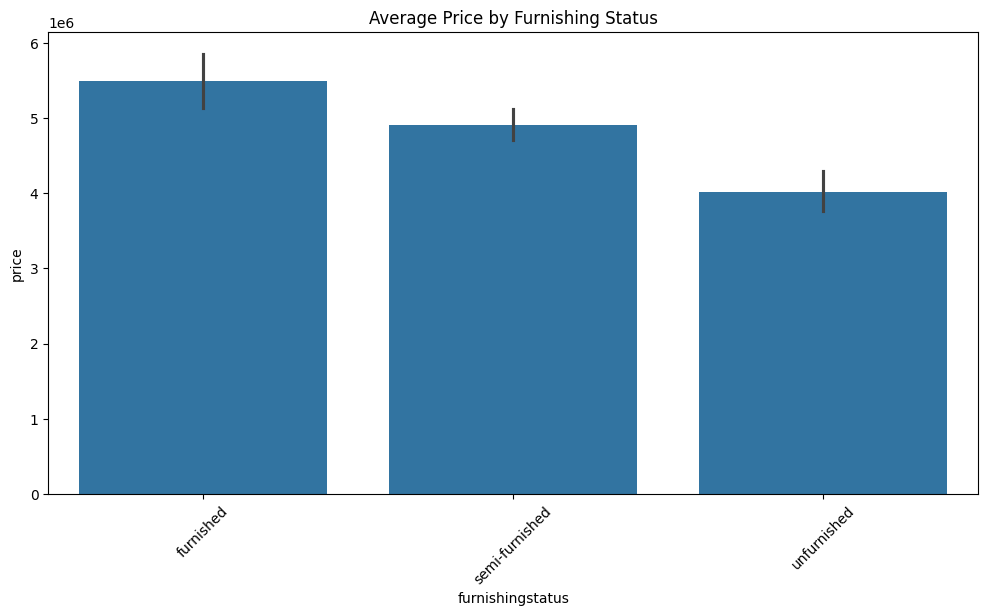


Model: Linear Regression
  RMSE: 0.2338
  MAE:  0.1884
  R²:   0.6088
  Custom Accuracy (within ±20%): 59.63%


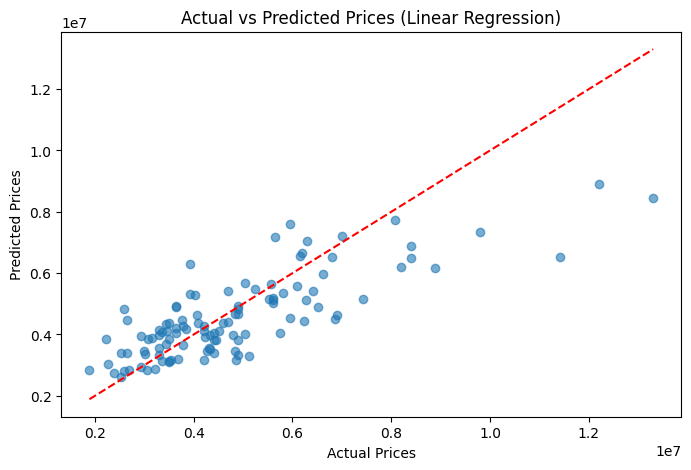


Model: Random Forest
  RMSE: 0.2385
  MAE:  0.1862
  R²:   0.5931
  Custom Accuracy (within ±20%): 66.06%
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8549adcc551ab472c6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import gradio as gr
import math

# 1. Load the Dataset
try:
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

# 2. Data Exploration
print("First 5 rows:\n", df.head())
print("\nShape:", df.shape)
print("\nData types and missing values:\n", df.info())
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

# 3. Data Cleaning
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
df = df.drop_duplicates()

# ==========================
# Data Visualization Section
# ==========================
numerical_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']

for var in numerical_vars:
    if var in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[var], kde=True)
        plt.title(f'Histogram of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.show()

for var in numerical_vars:
    if var in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[var])
        plt.title(f'Boxplot of {var}')
        plt.xlabel(var)
        plt.show()

plt.figure(figsize=(12,10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

features_for_pairplot = ['area', 'bedrooms', 'bathrooms', 'stories', 'price']
existing_features = [feat for feat in features_for_pairplot if feat in df.columns]
if len(existing_features) >= 2:
    sns.pairplot(df[existing_features])
    plt.suptitle("Pairplot of Features", y=1.02)
    plt.show()

if {'area', 'price'}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='area', y='price', data=df)
    plt.title("Scatterplot of Area vs Price")
    plt.show()

if 'furnishingstatus' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x='furnishingstatus', y='price', data=df, estimator=np.mean)
    plt.title("Average Price by Furnishing Status")
    plt.xticks(rotation=45)
    plt.show()

# 4. Log Transformation
if 'price' in df.columns:
    df['price'] = np.log1p(df['price'])
    target = 'price'
else:
    print("Error: 'price' column is missing.")
    exit()

# 5. Feature Engineering
if 'OverallQual' in df.columns and 'GrLivArea' in df.columns:
    df['Qual_GrLiv_Interaction'] = df['OverallQual'] * df['GrLivArea']

# 7. Identify Features
X = df.drop(columns=[target])
y = df[target]
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# 8. Preprocessing
transformers = []
if len(numerical_cols) > 0:
    transformers.append(('num', StandardScaler(), numerical_cols))
if len(categorical_cols) > 0:
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols))
preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')
X_processed = preprocessor.fit_transform(X)

# 9. PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_processed)

# 10. Train-Test Split with Stratification
y_binned = pd.qcut(y, q=10, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y_binned, random_state=42
)

# 11. Model Training and Evaluation (with accuracy)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Convert predictions and targets back to original scale
    y_test_actual = np.expm1(y_test)
    y_pred_actual = np.expm1(y_pred)

    # Custom accuracy metric: % of predictions within 20% of actual value
    tolerance = 0.2
    accuracy = np.mean(np.abs(y_pred_actual - y_test_actual) / y_test_actual < tolerance)

    print(f"\nModel: {name}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  Custom Accuracy (within ±20%): {accuracy * 100:.2f}%")

    if name == "Linear Regression":
        plt.figure(figsize=(8, 5))
        plt.scatter(y_test_actual, y_pred_actual, alpha=0.6)
        plt.plot([y_test_actual.min(), y_test_actual.max()],
                 [y_test_actual.min(), y_test_actual.max()], 'r--')
        plt.title(f"Actual vs Predicted Prices ({name})")
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.show()

# 12. Final Model for Gradio Interface
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train, y_train)

def predict_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement,
                 hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
    try:
        feature_values = {
            'area': float(area),
            'bedrooms': int(bedrooms),
            'bathrooms': float(bathrooms),
            'stories': int(stories),
            'mainroad': mainroad,
            'guestroom': guestroom,
            'basement': basement,
            'hotwaterheating': hotwaterheating,
            'airconditioning': airconditioning,
            'parking': int(parking),
            'prefarea': prefarea,
            'furnishingstatus': furnishingstatus,
        }
        input_df = pd.DataFrame([feature_values])
        input_processed = preprocessor.transform(input_df)
        input_pca = pca.transform(input_processed)
        prediction_log = final_model.predict(input_pca)
        return round(np.expm1(prediction_log[0]), 2)
    except Exception as e:
        return f"Error during prediction: {e}"

# 13. Gradio Interface
input_components = [
    gr.Number(label="area"),
    gr.Number(label="bedrooms"),
    gr.Number(label="bathrooms"),
    gr.Number(label="stories"),
    gr.Dropdown(["yes", "no"], label="mainroad"),
    gr.Dropdown(["yes", "no"], label="guestroom"),
    gr.Dropdown(["yes", "no"], label="basement"),
    gr.Dropdown(["yes", "no"], label="hotwaterheating"),
    gr.Dropdown(["yes", "no"], label="airconditioning"),
    gr.Number(label="parking"),
    gr.Dropdown(["yes", "no"], label="prefarea"),
    gr.Dropdown(["furnished", "unfurnished", "semi-furnished"], label="furnishingstatus")
]

output = gr.Number(label="Predicted House Price")

interface = gr.Interface(
    fn=predict_price,
    inputs=input_components,
    outputs=output,
    title="Forecasting House Prices Using Data Science",
    description="Enter house features to predict its price."
)

interface.launch(share=True)